# Wai Yu Amanda Ng
## Student number: 1008217350
## UTORid: ngwai11

# Part I

In [1]:
# Import dataset "Crime Replication Dataset" 
import pandas as pd; import numpy as np; from scipy import stats; import matplotlib.pyplot as plt; import random 
url = "https://github.com/amanda-ng518/STA365/blob/62e724be1797cc0eb1e6524d3c5bd557e11424e1/crime_replication.csv?raw=true" 
df = pd.read_csv(url) 
random.seed(1008217350)

In [2]:
df['crime_victim'].replace('Yes', 1, inplace=True)
df['crime_victim'].replace('No', 0, inplace=True)

y = df["crime_victim"].to_numpy().transpose()
X = df['trait_anxiety'].to_numpy().transpose()

In [3]:
import pymc as pm; import numpy as np    

with pm.Model() as model:
    # Standard normal priors for unknown beta parameters
    b0 = pm.Normal('b0', mu=0, sigma=1)
    b1 = pm.Normal('b1', mu=0, sigma=1)

    # Expected value of outcome
    mu = b0 + b1*X

    # Bernoulli distribution with logit function
    Y_obs = pm.Bernoulli('Y_obs',logit_p=mu, observed=y)
    
with model:
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b0, b1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


# Part II
# Regularized Loss Functions

***Machine Learning*** fits models by optimizing penalized ***loss functions***

Two classic regularizations are "ridge" and "lasso" regression, which respectively use $L_2$ and $L_1$ penalty functions

- Ridge: $$\sum_{i=1}^n \frac{1}{2}(y_i-x_i^T\beta_{p \times 1})^2 + \lambda \sum_{j=1}^n \beta_j^2 = \frac{1}{2}(y-X\beta)^T(y-X\beta) + \lambda \sum_{j=1}^n \beta_j^2 = \frac{1}{2}||y-X\beta||_2^2 + \lambda ||\beta||_2^2 $$
- Lasso: $$\sum_{i=1}^n \frac{1}{2}(y-x_i^T\beta_{p \times 1})^2 + \lambda \sum_{j=1}^n |\beta_j| = \frac{1}{2}(y-X\beta)^T(y-X\beta) + \lambda \sum_{j=1}^n |\beta_j| = \frac{1}{2}||y-X\beta||_2^2 + \lambda ||\beta||_1$$
    
Show that for $\sigma=1$ and ***hyperparameters*** $b_i=0$ (ignoring normalizing proportionality constants) the log posterior distributions for $\beta$ using either ***normal*** or ***Laplace*** prior distributions have analagous forms to the above expressions

Now write down and understand the following: "Bayesians do not optimize posterior distributions, they sample from them; but, the posterior distributions are nonetheless 'regularizations' of the likelihood through the prior."

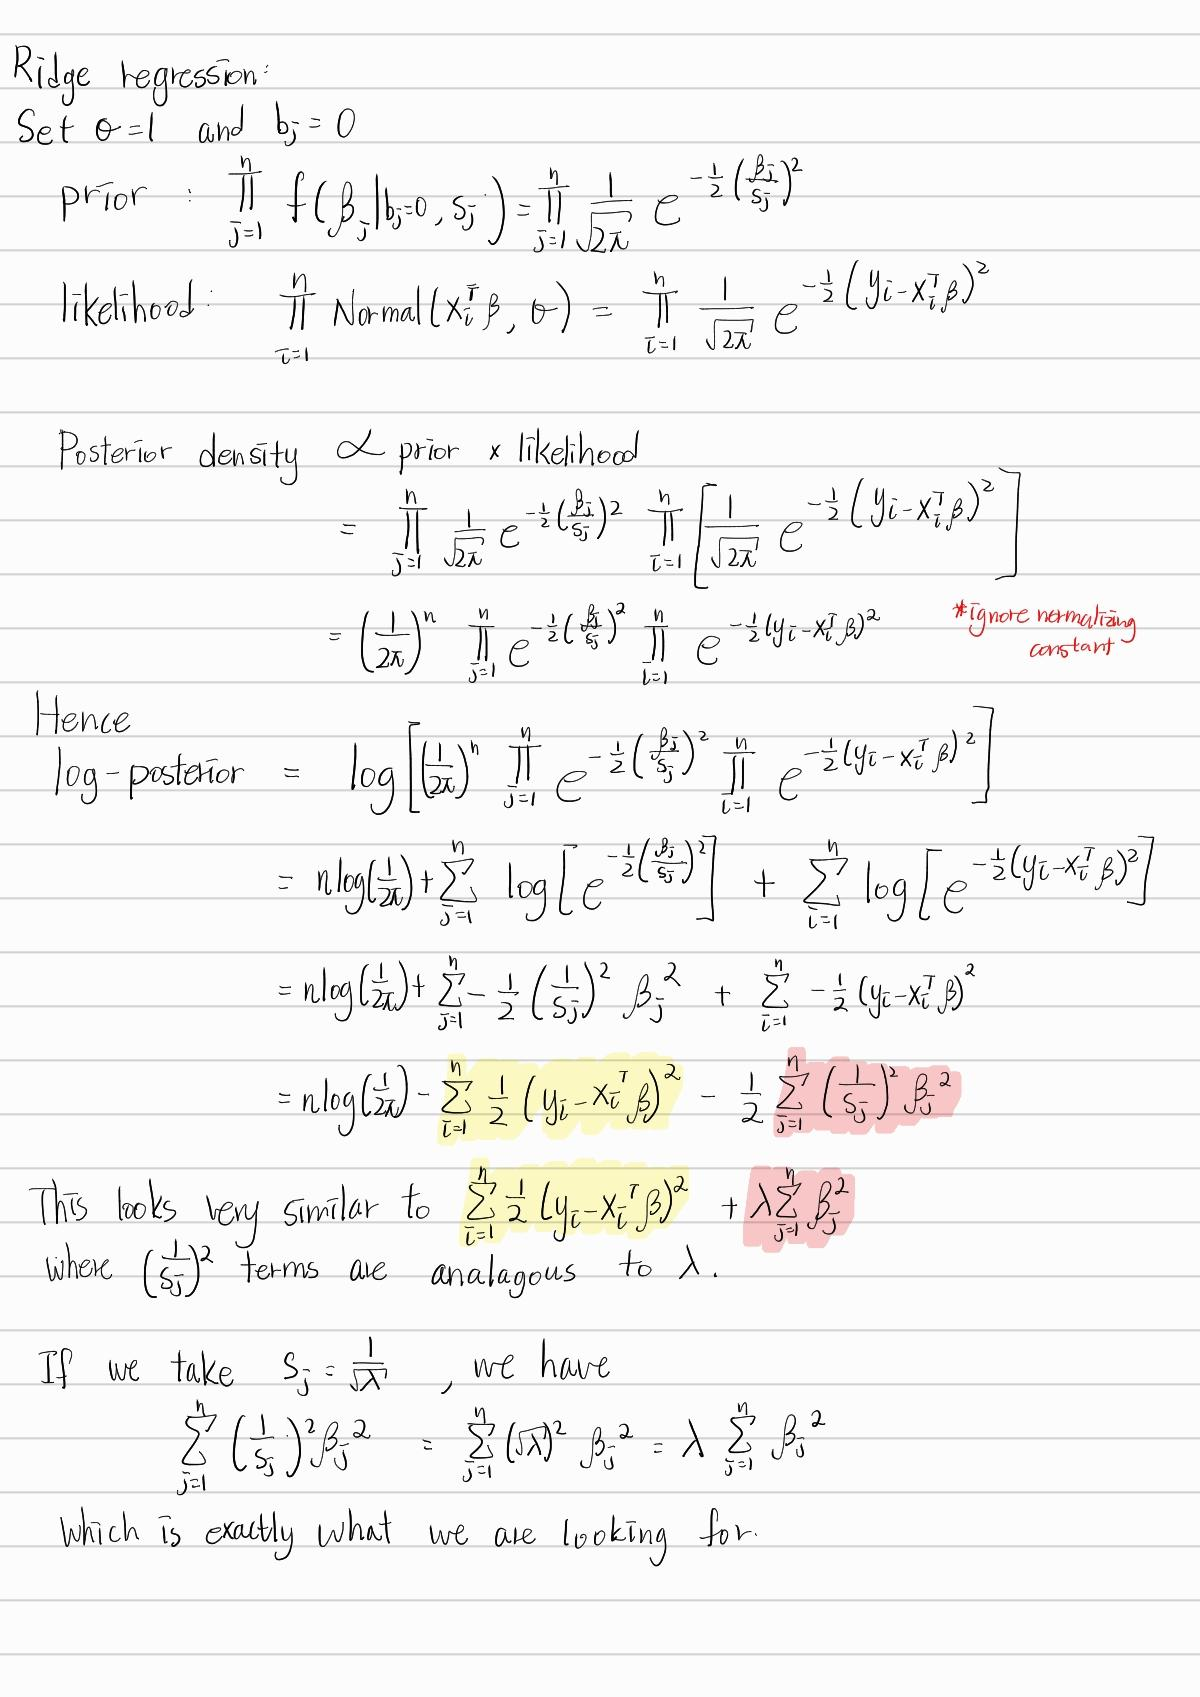

In [7]:
from IPython.display import Image
Image("Ridge.png")

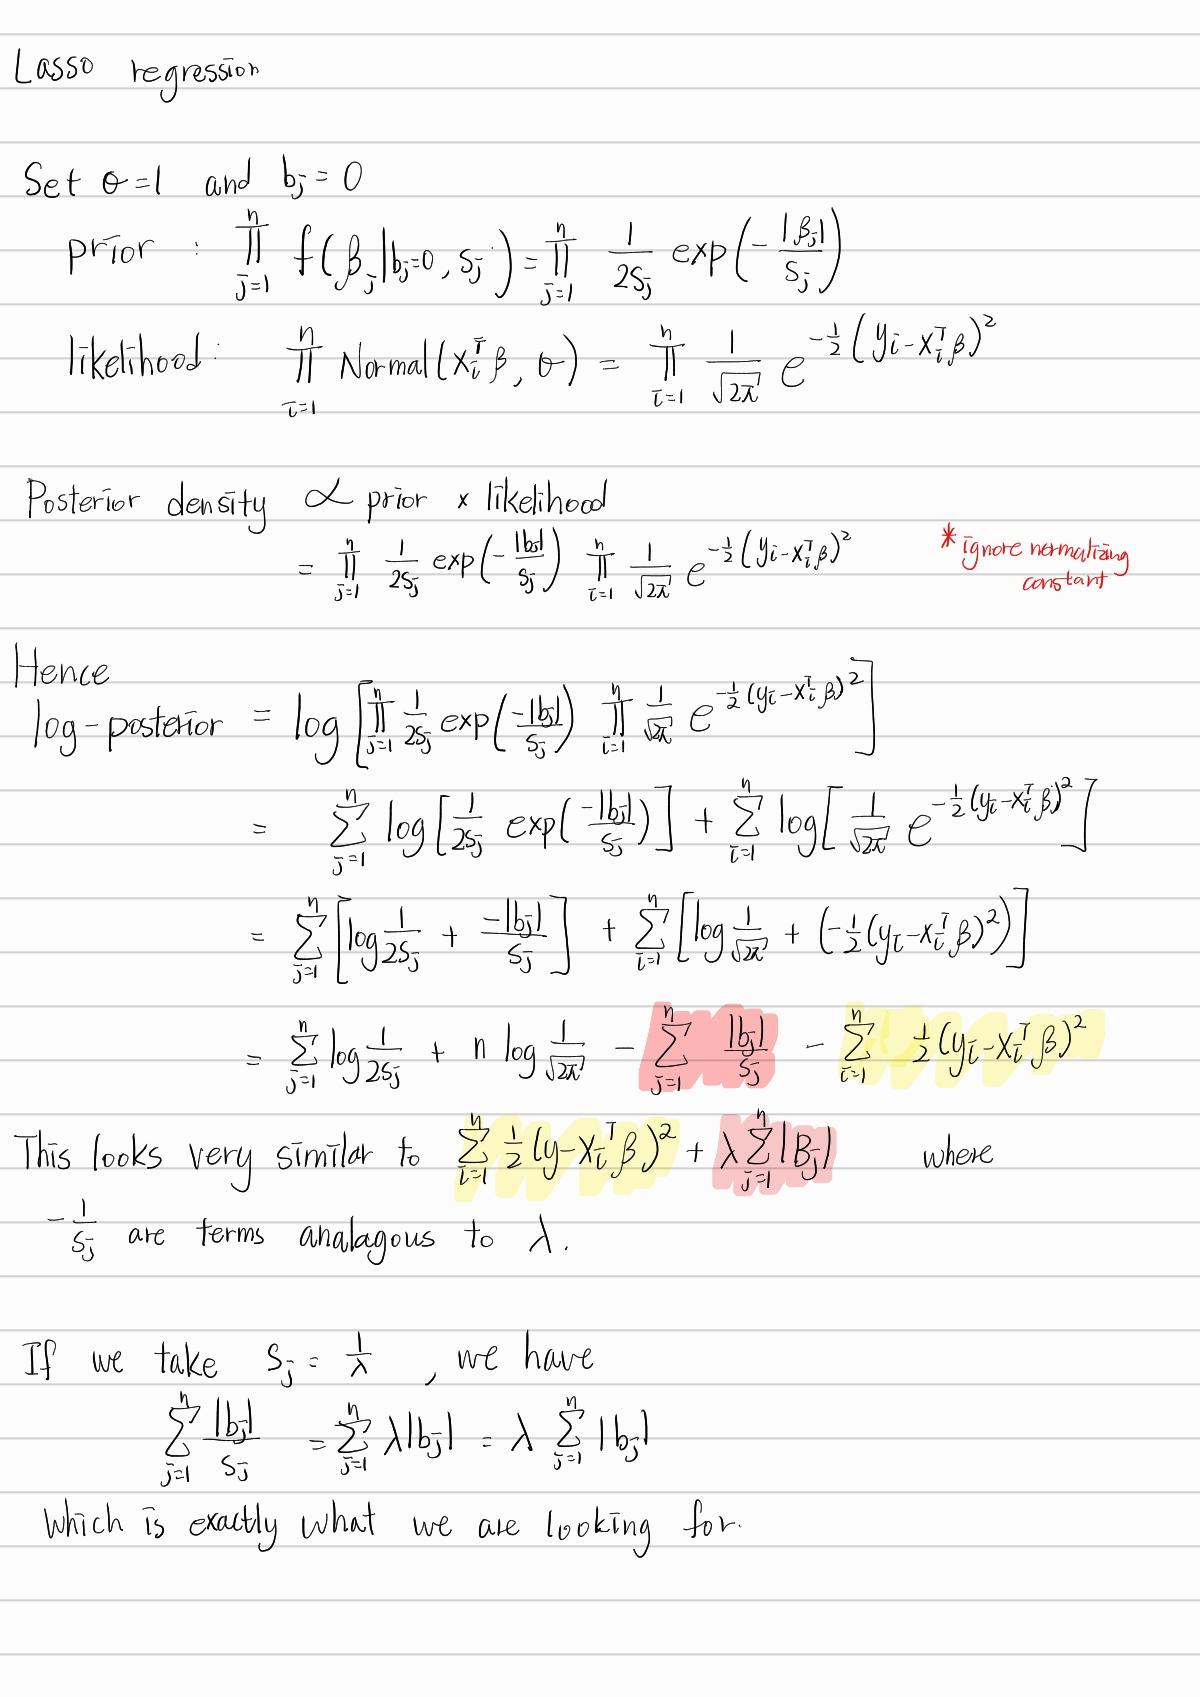

In [8]:
Image("Lasso.png")

## "Bayesians do not optimize posterior distributions, they sample from them; but, the posterior distributions are nonetheless 'regularizations' of the likelihood through the prior."

Notice that a posterior is concave which corresponds to maximizing, while an objective function based on a loss function is convex, which corresponds to minimizing. So, if we want to optimize posterior distribution by maximizing it, we would would optimize (concave) likelihoods (for MLE) by minimizing (convex) loss functions that are often negative log likelihoods.